<a href="https://colab.research.google.com/github/chaeyeonlee0417/VITAmin/blob/main/%EB%B9%84%ED%83%80%EB%AF%BC_13%EA%B8%B0_14%EC%A3%BC%EC%B0%A8_%EC%98%88%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EC%B1%84%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍋딥러닝 세션 - 14주 예습과제🍋**

## **4조**
**오차역전파(계산 그래프, 연쇄법칙, 역전파)**

## 1. 계산 그래프 및 연쇄법칙

계산 그래프는 계산 과정을 복수의 노드와 엣지로 표현되는 자료구조인 그래프로 나타낸 것으로, 노드는 원으로 표기하고 원 안에 연산 내용을 적습니다. 또한, 계산 결과는 화살표 위에 표기하여 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전해지게 됩니다. <br>

문제 1 : 계산 그래프를 사용하는 장점은 무엇일까요? (힌트 : 국소적 계산) (5점)

정답 : 계산 그래프를 사용하면 각 노드에서 국소적 계산이 이루어지기 때문에 계산 과정의 이해와 디버깅이 용이합니다. 또한, 복잡한 계산을 단순한 연산의 조합으로 분해할 수 있어 계산의 효율성과 재사용성을 높입니다. 마지막으로, 역전파 알고리즘을 통해 자동 미분이 가능해 기계 학습 모델의 최적화 과정에 유리합니다.

계산 그래프를 활용하여 간단한 예제를 풀어보겠습니다.

예제 : 마트에서 사과 1개의 가격은 100원이며, 사과를 2개 구매하였을 때의 지불 금액은 얼마일까요? 단, 소비세는 10%입니다. <br>
풀이 : 첫 번째 연산은 사과 1개의 가격과 사과의 개수의 곱셈입니다. 두 번째 연산은 첫 번째 연산의 결과와 소비세의 곱셈입니다. 따라서, 지불 금액은 (100 * 2) * 1.1 = 220(원)입니다.

계산 그래프는 하단과 같습니다.

문제 2 : 마트에서 사과 1개의 가격은 100원, 귤 1개의 가격은 150원일 때, 사과 2개와 귤 3개를 구매하였을 때의 지불 금액은 얼마일까요? 단, 소비세는 10%입니다. 계산 그래프를 활용하여 문제를 풀어주세요. (5점) <br>

(노드와 화살표로 답안 작성에 어려움이 있어 예제의 풀이와 같이 적어주시면 됩니다.)

정답 : 사과 가격 계산:
100
×
2
=
200
100×2=200
귤 가격 계산:
150
×
3
=
450
150×3=450
총 가격 계산:
200
+
450
=
650
200+450=650
최종 지불 금액 계산:
650
×
1.1
=
715
650×1.1=715
따라서, 지불 금액은 715원입니다.

문제 3 : 풀이한 문제의 정답 확인을 위해 하단 첫 번째 셀을 실행하고, 두 번째 셀의 코드를 마저 채워서 정답을 확인해주세요. (10점)

In [1]:
# 코드 수정없이 실행

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

In [2]:
# 공란 채우기

# 입력 값 설정
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층 생성
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
total_price = add_apple_orange_layer.forward(apple_price, orange_price)
price_with_tax = mul_tax_layer.forward(total_price, tax)

print(f"지불 금액 : {price_with_tax:.0f}원")

지불 금액 : 715원


모범 답안) <br>
지불 금액 : 715원

문제 4 : 계산 그래프에서 왼쪽부터 오른쪽으로 진행하는 방식을 <>, 오른쪽에서 왼쪽으로 진행하는 방식을 <>라고 합니다. <>에 들어갈 단어를 순서대로 적어주세요. (5점)

정답 : 순전파, 역전파

## 2. 연쇄 법칙 및 역전파

문제 1 : 연쇄 법칙은 국소적인 미분을 오른쪽에서 왼쪽으로 진행하는 계산 그래프의 역전파와 같습니다. 즉, 합성 함수의 <>을 계산하는 방법으로 합성 함수를 구성하는 각 함수의 <>의 곱으로 나타낼 수 있습니다. <>에 들어갈 단어를 적어주세요. (<>은 모두 동일한 단어) (5점)

정답 : 미분

문제 2 : 역전파는 신경망의 학습 과정에서 사용됩니다. 역전파의 주요 목적은 무엇인가요? (5점)

a) 새로운 데이터를 생성하기 위해서 <br>
b) 입력 데이터의 차원을 줄이기 위해서 <br>
c) 네트워크의 가중치를 업데이트하여 손실을 최소화하기 위해서 <br>
d) 네트워크의 출력을 증가시키기 위해서 <br>

정답 : c

문제 3 : 상단에서 풀이한 계산 그래프 예제입니다. 계산 그래프의 역전파를 이용하여 소비세에 대한 지불 금액의 미분을 구하면 200이라면, 사과 가격의 미분과 사과 개수의 미분은 얼마인가요? (5점)

정답 : 사과 가격에 대한 미분 400,
사과 개수에 대한 미분 20000

문제 4 : 계산 그래프를 확인하고 사과 가격에 대한 미분, 사과 개수에 대한 미분, 귤 가격에 대한 미분, 귤 개수에 대한 미분, 소비세에 대한 미분을 구하시오. (5점)

정답 : 사과 가격에 대한 미분: 400
사과 개수에 대한 미분: 20000
귤 가격에 대한 미분: 600
귤 개수에 대한 미분: 30000
소비세에 대한 미분: 200

문제 5 : 풀이한 문제의 정답 확인을 위해 하단 첫 번째 셀을 실행하고, 두 번째 셀의 코드를 마저 채워서 정답을 확인해주세요. (5점)

In [3]:
# 코드 수정없이 실행

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y  # x에 대한 미분
        dy = dout * self.x  # y에 대한 미분
        return dx, dy

class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout  # x에 대한 미분
        dy = dout  # y에 대한 미분
        return dx, dy

In [4]:
# 입력 값 설정
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층 생성
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
total_price = add_apple_orange_layer.forward(apple_price, orange_price)
price_with_tax = mul_tax_layer.forward(total_price, tax)

# 역전파
dprice_with_tax = 1
dtotal_price, dtax = mul_tax_layer.backward(dprice_with_tax)
dapple_price, dorange_price = add_apple_orange_layer.backward(dtotal_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f"사과 가격에 대한 미분: {dapple:.1f}, 사과 개수에 대한 미분: {dapple_num:.0f}")
print(f"귤 가격에 대한 미분: {dorange:.1f}, 귤 개수에 대한 미분: {dorange_num:.0f}")
print(f"소비세에 대한 미분: {dtax:.0f}")

사과 가격에 대한 미분: 2.2, 사과 개수에 대한 미분: 110
귤 가격에 대한 미분: 3.3, 귤 개수에 대한 미분: 165
소비세에 대한 미분: 650


모범 답안)<br>
사과 가격에 대한 미분: 2.2, 사과 개수에 대한 미분: 110<br>
귤 가격에 대한 미분: 3.3, 귤 개수에 대한 미분: 165<br>
소비세에 대한 미분: 650

---

## **5조**

## **1. 오차역전파(단순한 계층, 활성화 함수 계층 구현)**
(총 25점)

**1-1. 신경망의 기능 단위를 의미하는 단어는 무엇인가요? (2점)**

답) 뉴런

**1-2. 다음은 순전파와 역전파의 메서드입니다. 각각 어떠한 역할을 하는지  설명해주세요. (3점)**


forward() : 순전파

backward() : 역전파




답)
forward() : 순전파
*   역할: 순전파 메서드는 입력 데이터를 받아 네트워크를 통해 연산을 진행하며, 최종적으로 출력 값을 생성합니다. 신경망에서 입력부터 출력까지 데이터를 전달하며 각 계층(레이어)의 가중치와 편향을 이용해 연산을 수행하는 과정입니다. 이는 예측이나 추론에 사용됩니다.

backward() : 역전파
*   역할: 역전파 메서드는 출력에서부터 입력 방향으로 그래디언트를 계산하여 네트워크의 각 계층에 대한 미분 값을 구합니다. 이를 통해 손실 함수의 값을 최소화하기 위해 가중치와 편향을 업데이트합니다. 주로 학습 단계에서 사용되며, 이를 통해 모델의 파라미터를 조정하여 학습을 진행합니다.




**1-3. 아래 곱셈 계층 코드를 완성해주세요. (4점)**

In [5]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y  # x에 대한 미분
        dy = dout * self.x  # y에 대한 미분
        return dx, dy

**1-4. 위 곱셈 계층 구현 코드를 완성하고 설명해주세요. (4점)**

답)

*   init 메서드: 이 메서드는 클래스가 인스턴스화될 때 호출됩니다. 초기화 메서드로, self.x와 self.y를 None으로 설정하여 곱셈 계층의 입력값을 저장할 변수를 초기화합니다.
*   forward 메서드: 이 메서드는 순전파를 수행합니다. 입력값 x와 y를 받아 이들을 곱한 결과를 out에 저장하고, 그 결과를 반환합니다. 또한 입력값 x와 y를 self.x와 self.y에 각각 저장하여 나중에 역전파 계산에 사용할 수 있도록 합니다.
*   backward 메서드: 이 메서드는 역전파를 수행합니다. dout은 출력값에 대한 손실의 미분입니다. 역전파를 통해 입력값 x와 y에 대한 미분 dx와 dy를 계산합니다.
dx = dout * self.y: 출력값에 대한 손실의 미분 dout에 저장된 y를 곱해 x에 대한 미분 dx를 계산합니다.
dy = dout * self.x: 출력값에 대한 손실의 미분 dout에 저장된 x를 곱해 y에 대한 미분 dy를 계산합니다.
*   이들 dx와 dy를 반환하여 이전 계층으로 전달합니다.




**1-5. 아래 이미지를 보고 ??? 된 부분을 작성해주세요. (5점)**

> 이미지가 보이지 않는 경우, URL을 확인해주세요.

https://velog.velcdn.com/images%2Fkyj93790%2Fpost%2F69523c42-793c-4ac2-ba10-a2387846e043%2Fimage.png



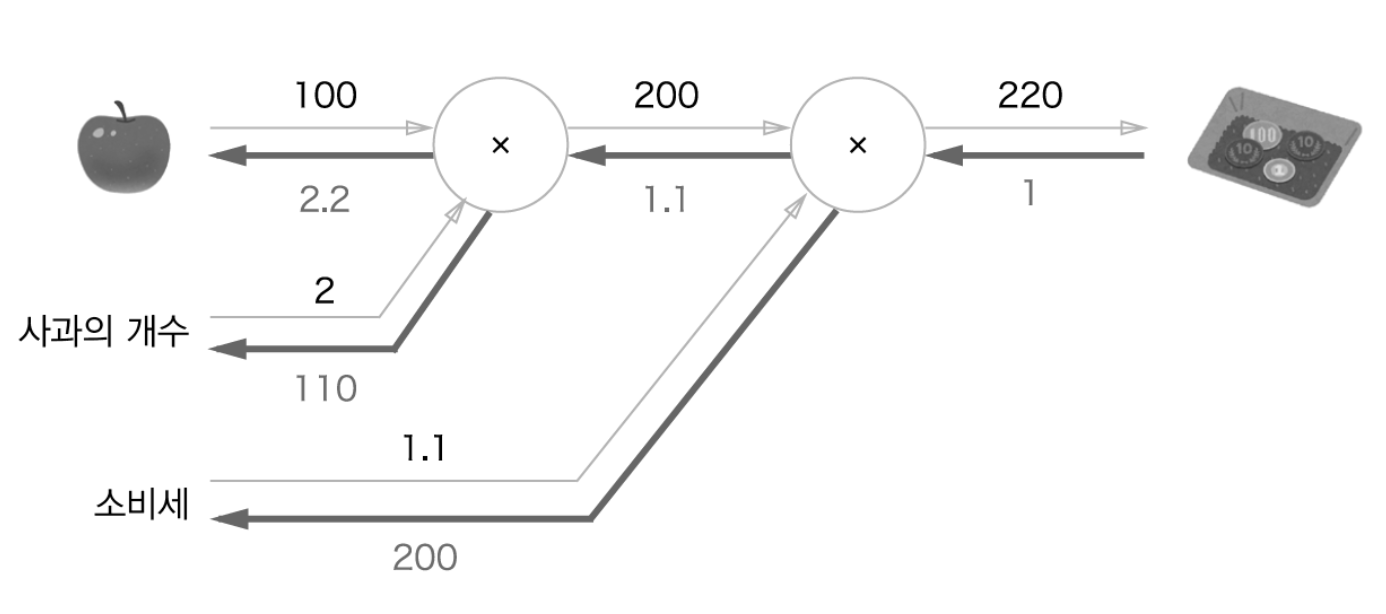

In [7]:
apple = 100
apple_num = 2
tax = 1.1

# 계층
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


모범 출력 답안)

price: 220

dApple: 2.2

dApple_num: 110

dTax: 200

**1-6. ReLU 활성화 함수의 순전파와 역전파에서 하는 동작에 대해 옳은 설명은 무엇인가요? (3점)**

A. 순전파 때의 입력 값이 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다.

B. 순전파 때 x가 0 이하면 역전파 때는 역전파는 상류의 값을 그대로 하류로 흘린다.

C. 순전파 때 입력 값이 항상 0을 출력하고, 역전파 때 입력 값이 항상 1을 전달한다.

D. 순전파 때 입력 값이 항상 1을 출력하고, 역전파 때 입력 값이 항상 0을 전달한다.


답) A

**1-7. 아래는 Sigmoid 함수 구현 코드입니다. 코드를 완성해주세요. (4점)**

In [8]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * self.out * (1 - self.out)

        return dx

## 2. 오차역전파(Affine/Softmax 계층 구현)(총 25점)

**2-1. Affine계층은 신경망 순전파시 ???을 수행하는 계층이다.(2점)**

답) 선형 변환

**2-2. Affine transformation시에 행렬의 곱이 정상적으로 이루어지기 위해서, 대응하는 ???을 일치시켜야 한다.(2점)**

답) 차원

**2-3. Softmax 계층은 입력값을 ???하여 출력의 합이 1이 되도록 변형하여 출력한다.(2점)**

답) 정규화

**2-4. Softmax 앞의 Affine 계층의 출력을 ??? 라고 하는데, 신경망 추론 에서는 가장 높은 점수만 알면 되기 때문에 정규화 과정인 Softmax 계층은 필요하지 않다. 반면 신경망 학습 에서는 오차율이 다음 학습에 영향을 주기 때문에 정규화 과정이 필요하고 이 때문에 Softmax 계층이 필요하다.(2점)**

답)  Score

**2-5. 아래 그림은 Softmax계층과 손실함수인 교차 엔트로피 오차를 포함한 Softmax-with-Loss 계층의 역전파 결과를 간소화한 그래프입니다. 이를 토대로 Softmax 함수의 손실함수로 '교차 엔트로피 오차'를 사용하는 이유를 설명해주세요.(7점)**

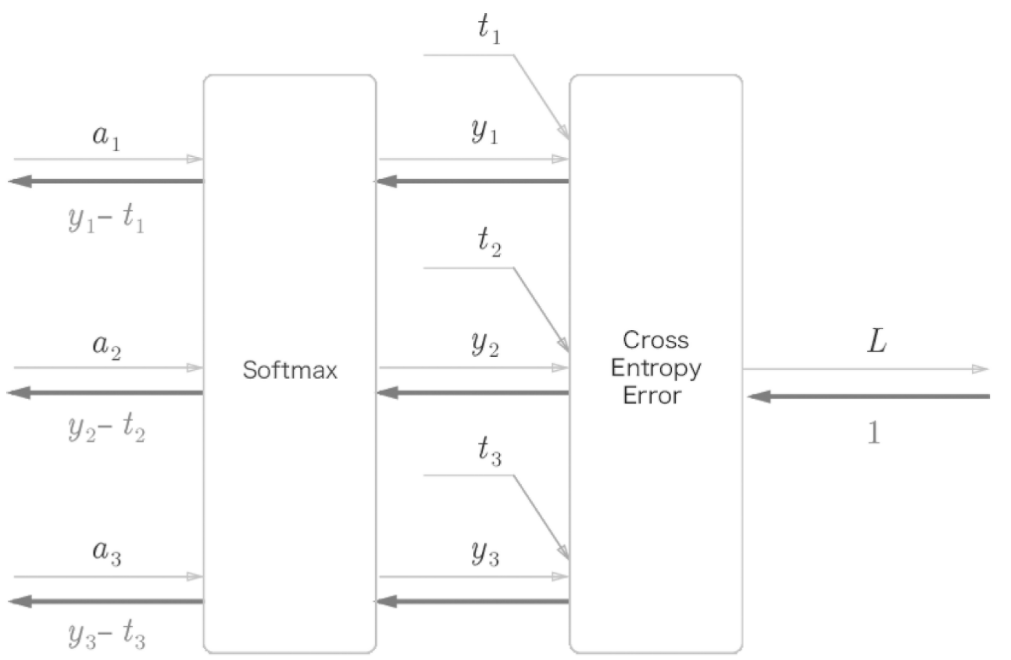

답) Softmax 함수의 손실 함수로 '교차 엔트로피 오차'를 사용하는 이유는, Softmax가 각 클래스의 확률 분포를 출력하기 때문입니다. 교차 엔트로피 오차는 이 확률 분포와 정답 레이블의 차이를 로그 확률로 계산하여 오차를 측정합니다. 이는 모델의 예측이 정답에 가까울수록 손실을 작게, 멀어질수록 크게 만듭니다. 또한, 교차 엔트로피 오차는 미분 가능하여 역전파를 통해 가중치 업데이트가 가능하며, 로그 함수를 사용해 잘못된 예측에 더 큰 페널티를 부여합니다. 이로 인해 모델이 더 정확한 예측을 하도록 학습하며, 수렴 속도를 빠르게 하고 안정적으로 만듭니다.

이미지가 안보일때 :
https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdNGeEt%2FbtqIBglUP07%2FSCSINpMMFp4JrYKb7F81Sk%2Fimg.png

**2-6. 아래는 Affine 계층을 구현하는 코드입니다. 코드를 완성하고 설명해주세요.(5점)**

In [10]:
# Affine 클래스 정의
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b

        self.x = None
        self.original_x_shape = None

        self.dW = None
        self.db = None

    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        dx = dx.reshape(*self.original_x_shape)
        return dx

답)

1.   초기화 메서드 (__init__): 가중치 W와 편향 b를 인수로 받아 초기화합니다.
순전파 때의 입력 x와 그 원래 모양을 저장할 original_x_shape를 초기화합니다.
역전파에서 계산된 가중치와 편향의 기울기 dW와 db를 초기화합니다.
2.   순전파 메서드 (forward): 입력 x의 원래 모양을 original_x_shape에 저장합니다. 입력 x를 2차원 배열로 변형합니다. (배치 크기와 데이터 차원)
변형된 입력 x와 가중치 W의 행렬 곱을 계산하고 편향 b를 더하여 출력 out을 구합니다.
3.   역전파 메서드 (backward): dout은 상위 계층에서 전해지는 기울기입니다.
입력 x에 대한 기울기 dx를 계산합니다. 이는 dout과 W의 전치 행렬과의 행렬 곱으로 구합니다. 가중치 W에 대한 기울기 dW는 입력 x의 전치 행렬과 dout의 행렬 곱으로 구합니다. 편향 b에 대한 기울기 db는 dout의 각 데이터의 합으로 구합니다. dx를 원래 입력 x의 모양으로 변형합니다.

이 코드는 Affine 계층에서 순전파와 역전파를 구현하여, 신경망에서 입력 데이터가 선형 변환되는 과정을 처리합니다

**2-7. 아래는 Softmax 계층을 구현하는 코드입니다. 코드를 완성하고 설명해주세요.(5점)**

In [14]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None  # 손실 값을 저장
        self.y = None     # Softmax의 출력 값을 저장
        self.t = None     # 정답 레이블을 저장

    def forward(self, x, t):
       self.t = t  # 정답 레이블 저장
       self.y = self.softmax(x)  # 입력값을 Softmax 변환하여 확률 분포 계산
       self.loss = self.cross_entropy_error(self.y, self.t)  # 교차 엔트로피 오차로 손실 계산
       return self.loss  # 손실 값 반환

    def backward(self, dout=1):
       batch_size = self.t.shape[0]  # 배치 크기
       dx = (self.y - self.t) / batch_size  # 입력값에 대한 기울기 계산
       return dx  # 기울기 반환

답) 이 클래스는 신경망의 출력값을 확률 분포로 변환하고, 이를 정답 레이블과 비교하여 손실을 계산하며, 역전파를 통해 기울기를 구하는 역할을 합니다. 순전파에서는 입력값을 Softmax 함수로 변환하고, 교차 엔트로피 오차를 통해 손실을 계산합니다. 역전파에서는 Softmax 출력과 정답 레이블의 차이를 계산하여 입력값에 대한 기울기를 구합니다. 이는 신경망의 학습 과정에서 중요한 역할을 하며, 모델이 올바르게 학습할 수 있도록 합니다.